In [226]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [173]:
train_data_default = pd.read_csv('train.csv')
test_data_default = pd.read_csv('test.csv')
print('\033[4mTrain Data Default HEAD : \033[0m')
print(train_data_default.head())
print('\n\033[4mTest Data Default HEAD : \033[0m')
print(test_data_default.head())

Train Data Default HEAD : 
      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984

Test Data Default HEAD : 
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


In [140]:
print('\033[4mTrain Data Default Describe : \033[0m')
print(train_data_default.describe())
print('\n\033[4mTest Data Default Describe : \033[0m')
print(test_data_default.describe())

Train Data Describe : 
                 x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618

Test Data Describe : 
                x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837


C:\Users\Abdullah\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


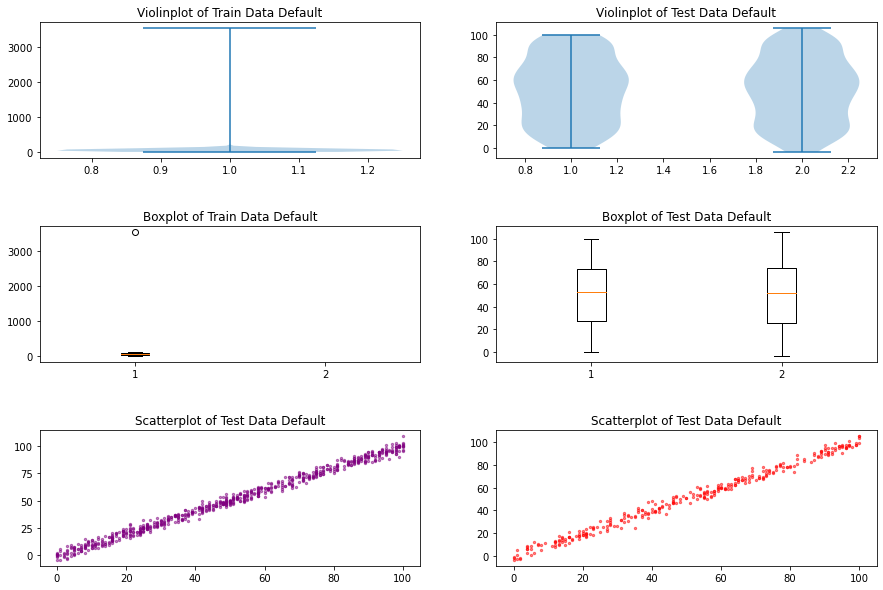

In [182]:
plt.figure
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axs[0,0].violinplot(train_data_default)
axs[0,0].set_title('Violinplot of Train Data Default')

axs[0,1].violinplot(test_data_default)
axs[0,1].set_title('Violinplot of Test Data Default')

axs[1,0].boxplot(train_data_default)
axs[1,0].set_title('Boxplot of Train Data Default')

axs[1,1].boxplot(test_data_default)
axs[1,1].set_title('Boxplot of Test Data Default')

axs[2,0].scatter(train_data_default['x'], train_data_default['y'], c='Purple', marker=None, s=5.5, edgecolors='Purple',alpha=0.5)
axs[2,0].set_title('Scatterplot of Test Data Default')

axs[2,1].scatter(test_data_default['x'], test_data_default['y'], c='Red', marker=None, s=5.5, edgecolors='Red',alpha=0.5)
axs[2,1].set_title('Scatterplot of Test Data Default')

plt.subplots_adjust(hspace=0.5)
plt.show()

There seems to be a missing value in y of the train dataset since the counts are different, Also their is an outlier in the test data that makes a huge difference

In [141]:
def missing_status(dataframe):
    boolean = pd.Series(dataframe.isna().any()).values
    count = pd.Series(dataframe.isna().sum()).values
    d = {'Missing Status' : boolean, 'Missing Count' : count }
    return pd.DataFrame(d,index=['x','y'])

In [142]:
print('\033[4mTrain Data Missing Values Status : \033[0m\n')
print(missing_status(train_data_default).to_string())
print('\n\033[4mTest Data Missing Values Status : \033[0m\n')
print(missing_status(test_data_default).to_string())

Train Data Missing Values Status : 

   Missing Status  Missing Count
x           False              0
y            True              1

Test Data Missing Values Status : 

   Missing Status  Missing Count
x           False              0
y           False              0


In [143]:
train_data = train_data_default.dropna()
test_data = test_data_default.dropna()

In [144]:
print('\033[4mTrain Data Missing Values Status : \033[0m\n')
print(missing_status(train_data).to_string())
print('\n\033[4mTest Data Missing Values Status : \033[0m\n')
print(missing_status(test_data).to_string())

Train Data Missing Values Status : 

   Missing Status  Missing Count
x           False              0
y           False              0

Test Data Missing Values Status : 

   Missing Status  Missing Count
x           False              0
y           False              0


In [145]:
print('\033[4mTrain Data Describe : \033[0m')
print(train_data.describe())
print('\n\033[4mTest Data Describe : \033[0m')
print(test_data.describe())

Train Data Describe : 
                x           y
count  699.000000  699.000000
mean    50.014306   49.939869
std     28.954560   29.109217
min      0.000000   -3.839981
25%     25.000000   24.929968
50%     49.000000   48.973020
75%     75.000000   74.929911
max    100.000000  108.871618

Test Data Describe : 
                x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837


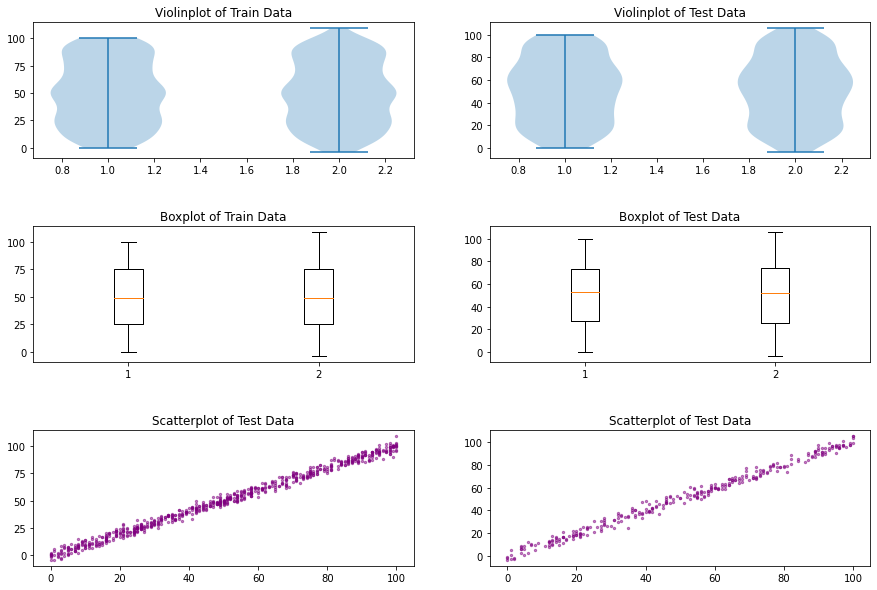

In [187]:
plt.figure
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axs[0,0].violinplot(train_data)
axs[0,0].set_title('Violinplot of Train Data')

axs[0,1].violinplot(test_data)
axs[0,1].set_title('Violinplot of Test Data')

axs[1,0].boxplot(train_data)
axs[1,0].set_title('Boxplot of Train Data')

axs[1,1].boxplot(test_data)
axs[1,1].set_title('Boxplot of Test Data')

axs[2,0].scatter(train_data['x'], train_data['y'], c='Purple', marker=None, s=5.5, edgecolors='Purple',alpha=0.5)
axs[2,0].set_title('Scatterplot of Test Data')

axs[2,1].scatter(test_data['x'], test_data['y'], c='Purple', marker=None, s=5.5, edgecolors='Purple',alpha=0.5)
axs[2,1].set_title('Scatterplot of Test Data')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [189]:
x_train = train_data['x'].values.reshape(-1,1)
y_train = train_data['y']

In [205]:
linear_Regression_Model = linear_model.LinearRegression()
linear_Regression_Model.fit(x_train,y_train)

LinearRegression()

In [291]:
print('\033[4mCo-efficient of the Model :\033[0m ',linear_Regression_Model.coef_)
print('\033[4mIntercept of the Model :\033[0m ',linear_Regression_Model.intercept_)
print('\033[4mNumber of features seen during fit in the Model :\033[0m ',linear_Regression_Model.n_features_in_)
print('\033[4mR2 Score of fit for Train set :\033[0m ',linear_Regression_Model.score(x_train,y_train))
train_MSE = mean_squared_error(train_data['y'],train_y_pred,squared=False)
print("\033[4mTrain Set MSE :\033[0m ",train_MSE)

Co-efficient of the Model :  [1.00065638]
Intercept of the Model :  -0.10726546430097272
Number of features seen during fit in the Model :  1
R2 Score of fit for Train set :  0.9907015319025518
Train Set MSE :  2.8049514672250013


In [238]:
train_y_pred = linear_Regression_Model.predict(train_data['x'].values.reshape(-1,1))
test_y_pred = linear_Regression_Model.predict(test_data['x'].values.reshape(-1,1))

In [292]:
test_MSE  = mean_squared_error(test_data['y'],test_y_pred,squared=False)
print('\033[4mR2 Score of fit for Test set :\033[0m ',linear_Regression_Model.score(test_data['x'].values.reshape(-1,1),test_data['x']))
print("\033[4mTest Set MSE :\033[0m ",test_MSE)

R2 Score of fit for Test set :  0.999992837632062
Test Set MSE :  3.071306268029827


Text(0.5, 1.0, 'Predicted values and Line representing them')

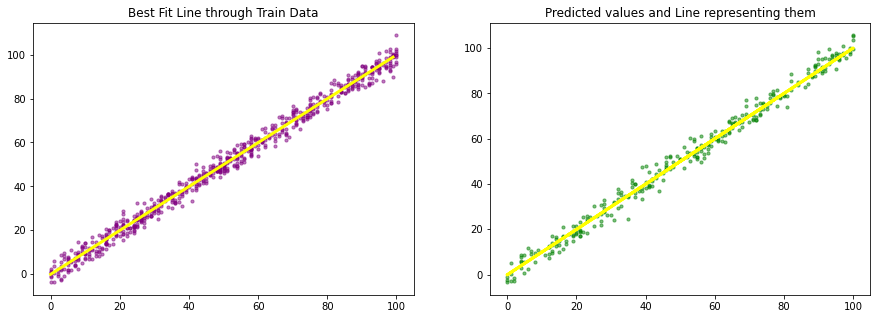

In [271]:
line = []
for i in range(100):
    line.append((1.00065638*i) + (-0.10726546430097272))
    
plt.figure
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axs[0].scatter(train_data['x'], train_data['y'], c='Purple', marker=None, s=10, edgecolors='Purple',alpha=0.5)
axs[0].plot(range(100),line,c='Yellow',linewidth=3)
axs[0].set_title('Best Fit Line through Train Data')

axs[1].scatter(test_data['x'], test_data['y'], c='Green', marker=None, s=10, edgecolors='Green',alpha=0.5)
axs[1].plot(test_data['x'],test_y_pred,c='Yellow',linewidth=3)
axs[1].set_title('Predicted values and Line representing them')

Co-efficient of the Model :  [28.94465916]
Intercept of the Model :  [49.95591408]
Number of features seen during fit in the Model :  1
R2 Score of fit for Train set :  0.9907011486876461
Test Set MSE :  3.2806587014582145


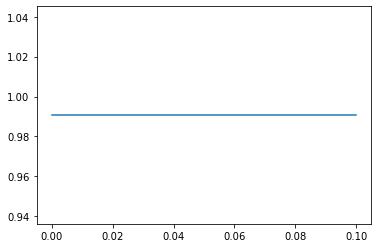

In [302]:
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(test_data['x'].values.reshape(-1,1))

SGD_model = linear_model.SGDRegressor(max_iter=1000)
SGD_model.fit(scaled_x_train,y_train)

score = []
alphas = [0.00001,0.0001,0.001,0.01,0.1]
for i in alphas:
    score.append(SGD_model.score(scaled_x_train,y_train))
plt.plot(alphas,score)

print('\033[4mCo-efficient of the Model :\033[0m ',SGD_model.coef_)
print('\033[4mIntercept of the Model :\033[0m ',SGD_model.intercept_)
print('\033[4mNumber of features seen during fit in the Model :\033[0m ',SGD_model.n_features_in_)
print('\033[4mR2 Score of fit for Train set :\033[0m ',SGD_model.score(scaled_x_train,y_train))
SGD_train_MSE = mean_squared_error(train_data['y'],SGD_train_y_pred,squared=False)
print("\033[4mTest Set MSE :\033[0m ",SGD_test_MSE)

In [297]:
SGD_train_pred = SGD_model.predict(scaled_x_train.reshape(-1,1))
SGD_test_pred = SGD_model.predict(scaled_x_test.reshape(-1,1))

In [299]:
SGD_test_MSE  = mean_squared_error(test_data['y'],SGD_test_pred,squared=False)
print('\033[4mR2 Score of fit for Test set :\033[0m ',SGD_model.score(scaled_x_test.reshape(-1,1),test_data['y']))
print("\033[4mTest Set MSE :\033[0m ",SGD_test_MSE)

R2 Score of fit for Test set :  0.987222736232544
Test Set MSE :  3.2806587014582145
